## Importing the dataset through Keras

In [1]:
from keras.datasets import mnist

C:\Everything\Software\Python\Anaconda\Files\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Library imports

In [2]:
from keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading the dataset

Each image has a label associated with it denoting the correct digit that's drawn

In [15]:
(train_imgs,train_lbls),(test_imgs,test_lbls)=mnist.load_data()

There are 10 classes to classify the images into (0-9)

In [16]:
classes=np.unique(train_lbls)
nClasses=len(classes)
nClasses

10

Shape of the test and train labels to see how many test and train images we have

In [17]:
print(len(test_lbls))
print(len(train_lbls))

10000
60000


In [18]:
dimdata=np.prod(train_imgs.shape[1:]) #28*28
dimdata

784

In [19]:
train_imgs[0].shape

(28, 28)

Number of training images (60,000), and each image has dimensions 28x28

In [20]:
train_imgs.shape

(60000, 28, 28)

Flattening the images (since neural networks cannot take 2D input directly)

In [21]:
train_data = train_imgs.reshape(train_imgs.shape[0], dimdata)
test_data = test_imgs.reshape(test_imgs.shape[0], dimdata)

In [22]:
#converting to float
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

Converting values to lie between 0 and 1 (since they are currently digits between 0 and 255, denoting how black each pixel is)

In [29]:
train_data /= 255
test_data /= 255

Keras uses one hot encoding

Hence changing the labels from integer to categorical data

In [30]:
train_labels_one_hot = to_categorical(train_lbls)
test_labels_one_hot = to_categorical(test_lbls)
 
#Display the change for category label using one-hot encoding
print('Original label 0 : ', train_lbls[2])
print('After conversion to categorical ( one-hot ) : ', train_labels_one_hot[2])

Original label 0 :  4
After conversion to categorical ( one-hot ) :  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


## Making the Keras Model

In [32]:
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(dimdata,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(nClasses,activation='softmax'))

**We add 2 dense layers that are fully interconnected. These perform linear operations**

The last Dense layer has 10 units (since we need to classify into 10 classes (0-9))

### Compiling the model, using RMSProp optimizer, with a categorical crossentropy loss so we can predict into multiple classes

In [34]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=["accuracy"])

### Fitting out data onto the model, with 256 images at a time, for 20 epochs.
We use the test data as validation

In [35]:
history=model.fit(x=train_data,y=train_labels_one_hot,batch_size=256,epochs=20,verbose=1,validation_data=(test_data,test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 281us/step - loss: 0.3064 - acc: 0.9069 - val_loss: 0.1601 - val_acc: 0.9502
Epoch 2/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.1118 - acc: 0.9654 - val_loss: 0.1021 - val_acc: 0.9683
Epoch 3/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0727 - acc: 0.9780 - val_loss: 0.0799 - val_acc: 0.9754
Epoch 4/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0519 - acc: 0.9837 - val_loss: 0.0862 - val_acc: 0.9721
Epoch 5/20
60000/60000 [==============================] - 3s 52us/step - loss: 0.0378 - acc: 0.9880 - val_loss: 0.0921 - val_acc: 0.9741
Epoch 6/20
60000/60000 [==============================] - 3s 54us/step - loss: 0.0284 - acc: 0.9910 - val_loss: 0.0834 - val_acc: 0.9767
Epoch 7/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0223 - acc: 0.9925 - val_loss: 0.0856 - val_a

### Plotting the training and validation losses, to see if the model is being overfitted.

Text(0.5,1,'Accuracy Curves')

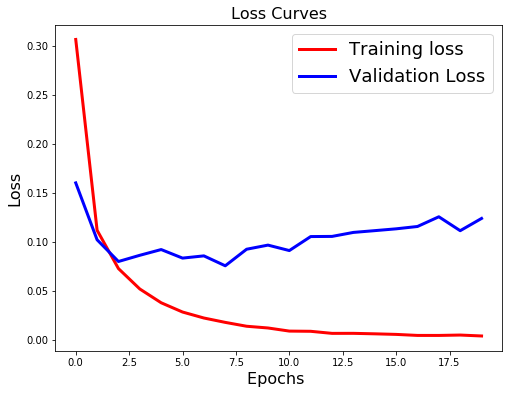

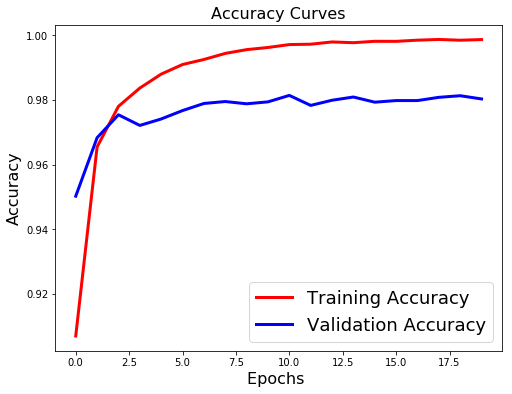

In [37]:
%matplotlib inline
#Checking for overfitting

#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'r',linewidth=3.0)
plt.plot(history.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

**We can see that the validation accuracy is far from the training accuracy**

This means that our model won't perform very well on unknown data.

### Reducing overfitting:

In [40]:
#To reduce overfitting
from keras.layers import Dropout

model2=Sequential()
model2.add(Dense(512,activation='relu',input_shape=(dimdata,)))
model2.add(Dropout(0.5))
model2.add(Dense(512,activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(nClasses,activation='softmax'))

In [20]:
#Testing now

model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history2=model2.fit(train_data, train_labels_one_hot, batch_size=256, epochs=20, verbose=1, validation_data=(test_data, test_labels_one_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.3703 - acc: 0.8849 - val_loss: 0.1466 - val_acc: 0.9541
Epoch 2/20
60000/60000 [==============================] - 5s 78us/step - loss: 0.1662 - acc: 0.9495 - val_loss: 0.1005 - val_acc: 0.9698
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 0.1306 - acc: 0.9605 - val_loss: 0.0843 - val_acc: 0.9743
Epoch 4/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.1081 - acc: 0.9686 - val_loss: 0.0769 - val_acc: 0.9776
Epoch 5/20
60000/60000 [==============================] - 5s 79us/step - loss: 0.0948 - acc: 0.9711 - val_loss: 0.0746 - val_acc: 0.9782
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0883 - acc: 0.9740 - val_loss: 0.0813 - val_acc: 0.9768
Epoch 7/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0814 - acc: 0.9760 - val_loss: 0.0826 - val_acc

Text(0.5,1,'Accuracy Curves')

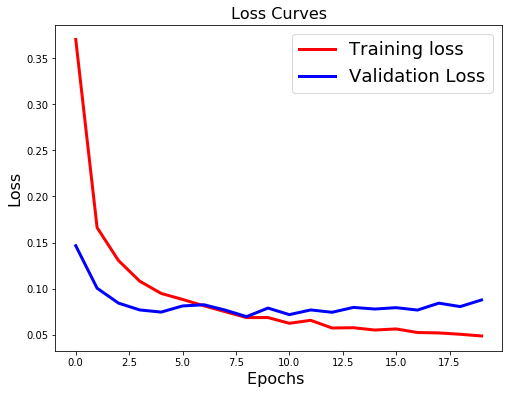

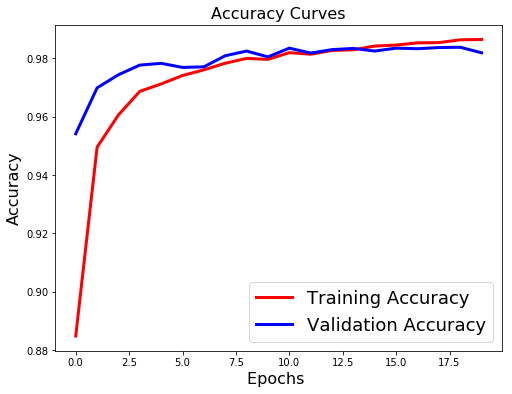

In [21]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['loss'],'r',linewidth=3.0)
plt.plot(history2.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history2.history['acc'],'r',linewidth=3.0)
plt.plot(history2.history['val_acc'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [22]:
#much better now, less overfitting, validation loss is not increasing,
#this model is generally better for unseen data

In [23]:
print("Accuracy of the model: %.2f%%"%(model.evaluate(test_data, test_labels_one_hot)[1]*100))

10000/10000 [==============================] - 2s 166us/step
Accuracy of the model: 98.20%


In [24]:
img_shape=(28,28)
plt.figure(figsize=(15, 15))
def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(np.argmax(cls_true[i]), cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [25]:
images = test_data[:9]
cls_true = test_labels_one_hot[:9]

In [26]:
y_pred=model.predict(x=images)
cls_pred=np.argmax(y_pred,axis=1)

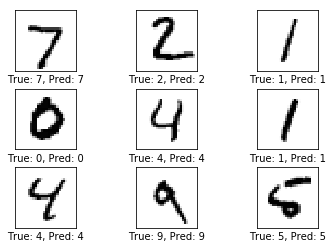

In [27]:
plot_images(images=images,
            cls_true=cls_true,
           cls_pred=cls_pred)